<a href="https://colab.research.google.com/github/renukagore107/CAPSTONE-PROJECT-3--CLASSIFICATION/blob/main/Email_Campaign_Effectiveness_Prediction_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name - Email Campaign Effectiveness Prediction
Project Type - Classification

Predicting the effectiveness of email campaign by marketing agencies using different ML classification models. Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

#Project Summary:

Most small to medium-sized business owners use Gmail-based Email marketing Strategies for offline targeting and converting prospective customers into leads so that they stay with them in business. The primary goal is to develop a machine learning model to characterise mail and track mail that is ignored, read, and acknowledged by the reader. The columns of data are self-explanatory.

#The data has the following features:

Email_ID - This column contains the email ids of individuals.

Email_type - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

Subject_Hotness_Score - It is the subject-line effectiveness score.

Email_Source - It represents the source of the email like sales,marketing or product type email.

Email_Campaign_Type - Campaign type

Total_Past_Communications - This column contains the previous mails from the source.

Customer_Location - Categorical data which explains the different demographic location of the customers.

Time_Email_sent_Category - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

Word_Count - It contains the no.of words in the mail.

Total_Links - Total links in the email body.

Total_Images - The banner images in the email body.

Email_Status - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.



#GitHub Link -

#Objective:

The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In addition to the ML Model prediction, we also analyzed what all features can help us in getting the Email status to be not ignored by the customers.

#Import Libraries:

In [1]:
#Importing important libraries and modules
#for data reading and manipulation
import pandas as pd
import numpy as np

#for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# Visualizing missing values
import missingno as msno

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modelling
#Train-Test Split
from sklearn.model_selection import train_test_split
#Grid Search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

#to ignore warnings
import warnings    
warnings.filterwarnings('ignore')


#Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
email_df=pd.read_csv('/content/drive/MyDrive/email project/data_email_campaign.csv')

#Dataset  View

In [4]:
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [5]:
email_df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


#Dataset Information

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [7]:
email_df.shape

(68353, 12)

In [8]:
email_df.describe(include='all')

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


In [9]:
#Check for any duplicates data
email_df.duplicated().sum()
     

0

#Missing Values/Null Value

In [10]:
#check for null values
email_df.isnull()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,False,False,False,False,False,False,False,False,False,False,False,False
68349,False,False,False,False,False,False,False,False,False,False,False,False
68350,False,False,False,False,True,False,False,False,False,False,False,False
68351,False,False,False,False,False,False,False,False,False,False,False,False


Data Cleaning and PreProcessing:
When we have raw data, it may contain missing values, NaN values or absurd values. It is necessary to check and handle these values before feeding it to the models, so as to obtain good insights on what the data is trying to say and make great characterisation and prediction which will in turn help improve the business's content.

In [11]:
#get the num of nulls in each column
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<AxesSubplot:>

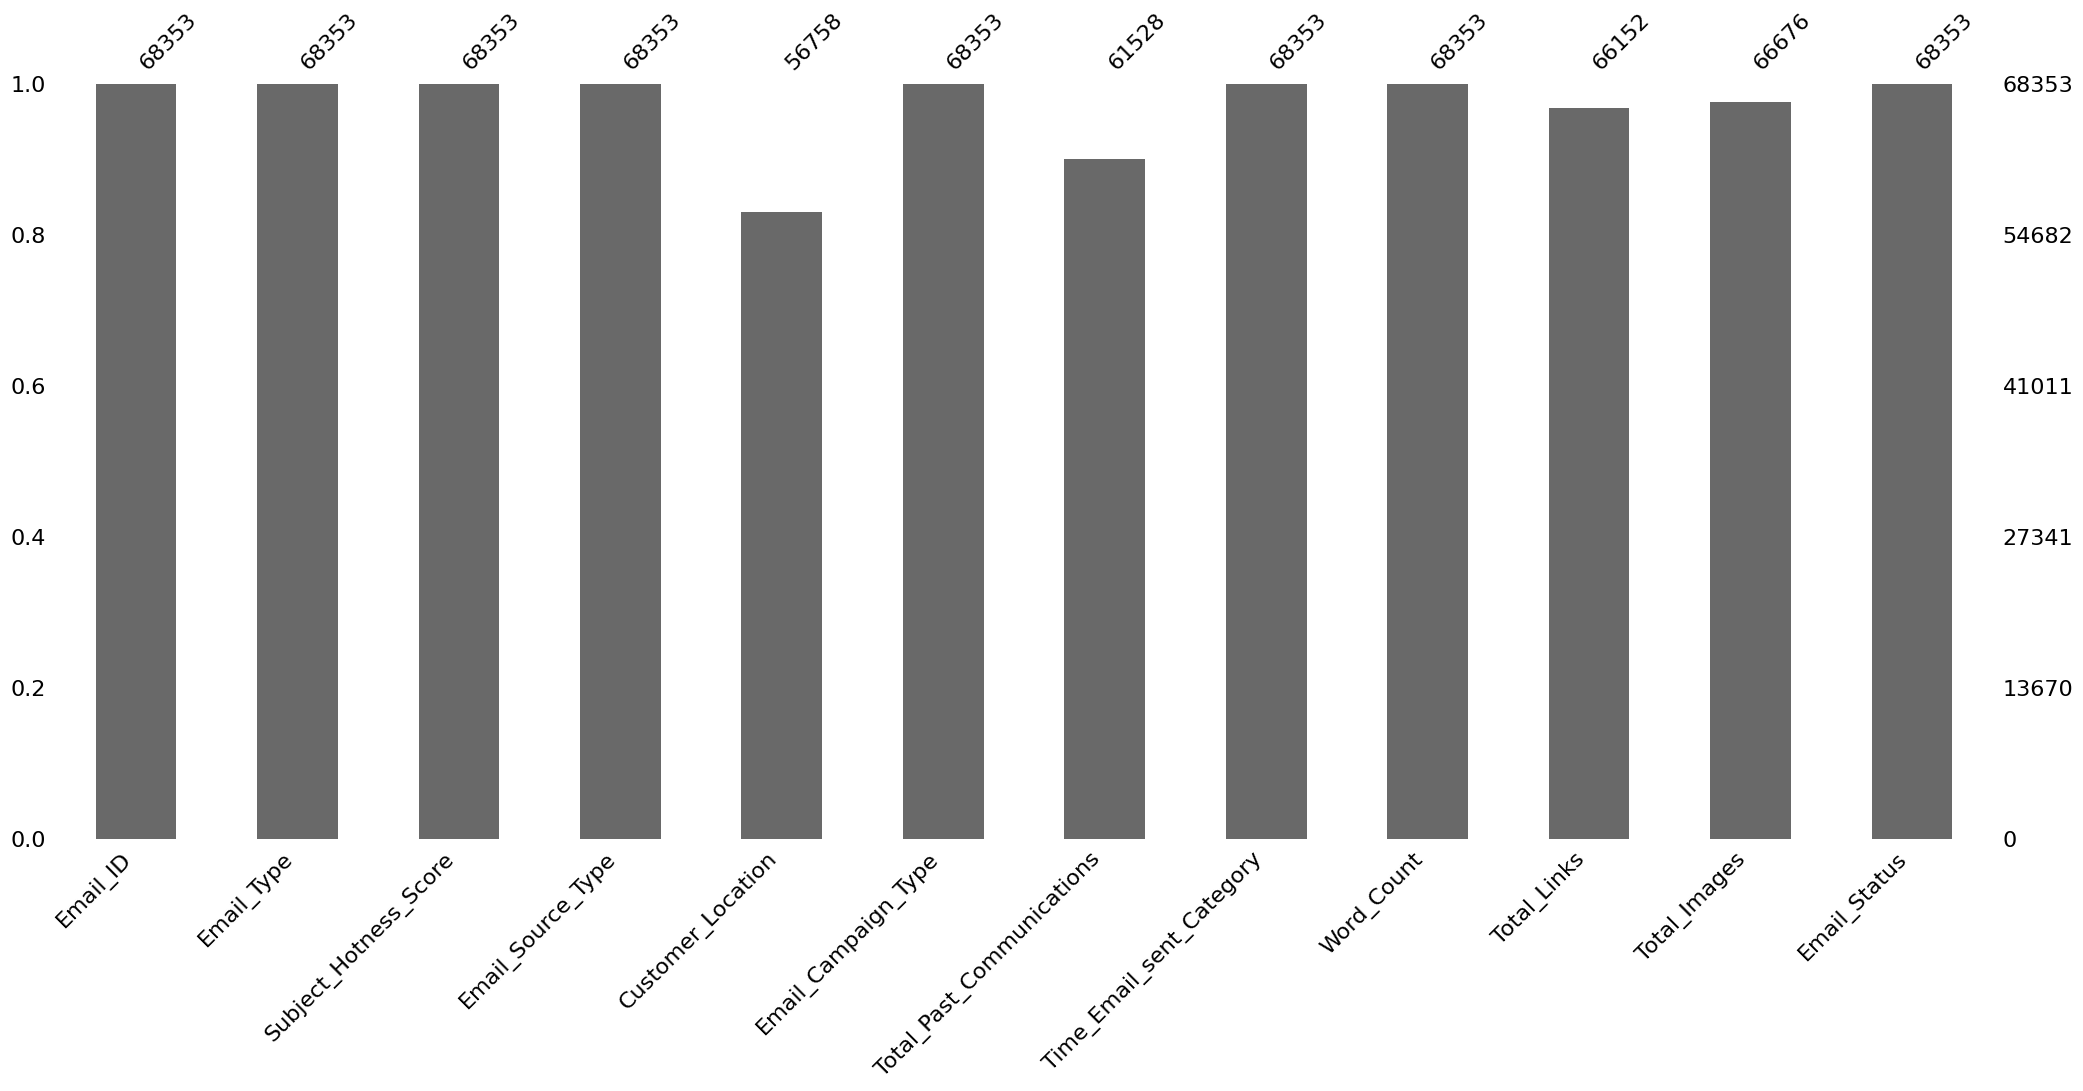

In [12]:
msno.bar(email_df)

In [13]:
# Check Unique Values for each variable.
email_df.nunique()

Email_ID                     68353
Email_Type                       2
Subject_Hotness_Score           51
Email_Source_Type                2
Customer_Location                7
Email_Campaign_Type              3
Total_Past_Communications       64
Time_Email_sent_Category         3
Word_Count                     151
Total_Links                     37
Total_Images                    45
Email_Status                     3
dtype: int64

Text(0.5, 1.0, 'Distributin of Total Images')

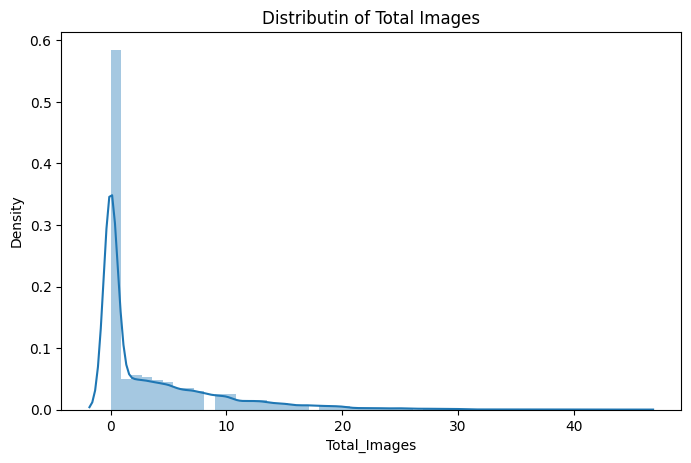

In [14]:
#let's see the distribution plot of total images
sns.distplot(email_df.Total_Images.dropna())
plt.title("Distributin of Total Images")

In [15]:
#Filling missing values of Total_images column
print('Number of missing values before imputing is = ',email_df['Total_Images'].isnull().sum())
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Images'].isnull().sum())
     

Number of missing values before imputing is =  1677
Number of missing values after imputing is =  0


Text(0.5, 1.0, 'Distributin of Total_Past_Communications ')

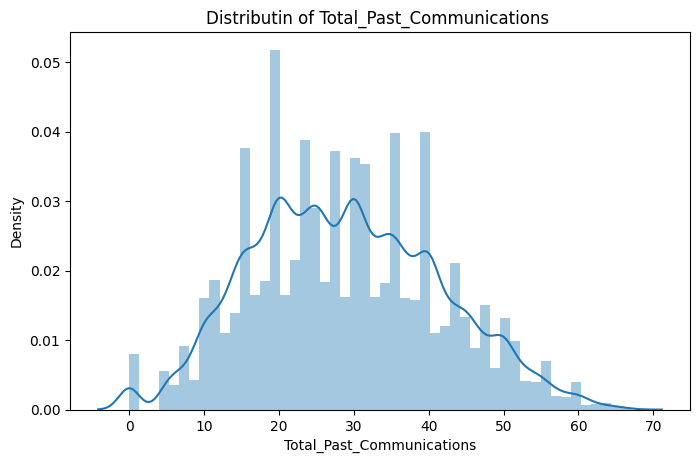

In [16]:
#let's see the distribution plot of past communication
sns.distplot(email_df.Total_Past_Communications .dropna())
plt.title("Distributin of Total_Past_Communications ")

In [17]:
print('Number of missing values before imputing is = ',email_df['Total_Past_Communications'].isnull().sum())
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(),inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Past_Communications'].isnull().sum())

Number of missing values before imputing is =  6825
Number of missing values after imputing is =  0


Text(0.5, 1.0, 'Distributin of Total_Links  ')

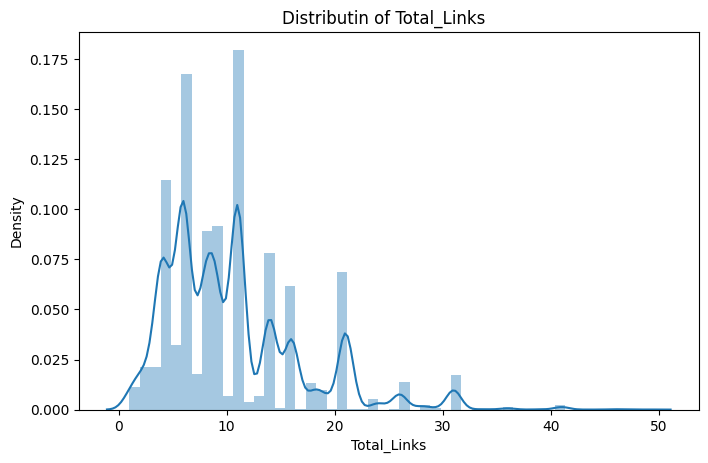

In [18]:
#let's see the distribution plot of total_links
sns.distplot(email_df.Total_Links .dropna())
plt.title("Distributin of Total_Links  ")

In [19]:
#Filling missing values of Total_Links column
print('Number of missing values before imputing is = ',email_df['Total_Links'].isnull().sum())
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0],inplace=True)
print('Number of missing values after imputing is = ',email_df['Total_Links'].isnull().sum())
     

Number of missing values before imputing is =  2201
Number of missing values after imputing is =  0


In [20]:
email_df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications        0
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                      0
Total_Images                     0
Email_Status                     0
dtype: int64

still now location column has null value. we will impute it in next part

In [21]:
#check for duplicates
email_df.duplicated().sum()
     

0

**Exploratory Data Analysis:**
Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

We will explore every feature against our target variable and analyze it's influence on it.

**Categorical Variables:**
We have six categorical variables Email Type, Email Source, Email Campaign Type, Time Email sent Category, Customer Location and Email Status. We should keep in mind that we have a lot of null values in Customer Location feature and after analysing it's influence on our target variable, we will fill it accordingly or remove it. If a particular location is influencing our target variables and aiding in to getting it ignored or otherwise, it should be filled on a condition (on Email Status) row wise.

**Continuous Variables:** 
Our continuous variables include Subject Hotness Score, Total Past Communications, Word Count, Total Links and Total Images.

In [22]:
#Analysis of Categorical data
#creating new dataframe of only categorical columns
ds_cat = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
ds_cat.drop('Word_Count',axis=1,inplace=True)
ds_cat.head()

,Email_ID,Email_Type,Email_Source_Type,Customer_Location,Email_Campaign_Type,Time_Email_sent_Category,Email_Status
0,EMA00081000034500,1,2,E,2,1,0
1,EMA00081000045360,2,1,NaN,2,2,0
2,EMA00081000066290,2,1,B,3,2,1
3,EMA00081000076560,1,2,E,2,2,0
4,EMA00081000109720,1,2,C,3,2,0


In [23]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [ds_cat[c].unique()]
    tmp['Total Count'] = len(list(ds_cat[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(ds_cat[c].nunique())
    tmp['Missing Value'] = ds_cat[c].isnull().sum()
    tmp['Missing %'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats
     

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


As we can see we have 17% missing values in Customer Location.

There is no missing values in any other categorical variable.

Email_Type and Email_Source_Type have 2 categories.

Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

In [24]:
# code for showing bar percentage
def barPerc(email_df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in email_df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
     


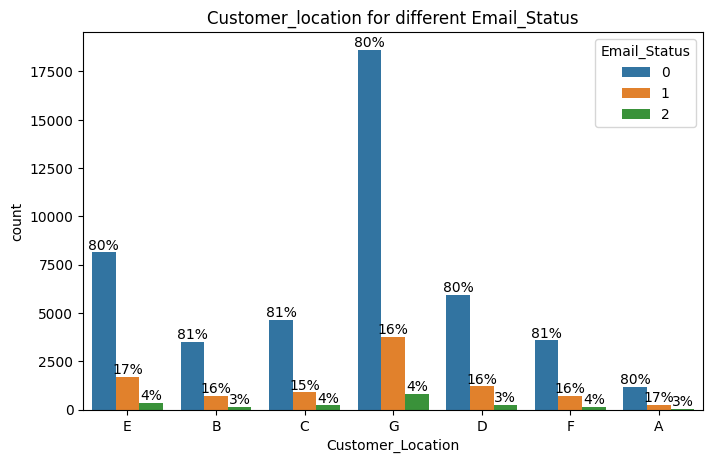

In [25]:
ax=sns.countplot(email_df['Customer_Location'],hue=email_df["Email_Status"])
plt.title('Customer_location for different Email_Status')
barPerc(email_df,'Customer_Location',ax)


As Customer_Location is not much related with email_Status so we are gona drop this column



In [26]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df = email_df.drop(columns_to_drop,axis=1)
     

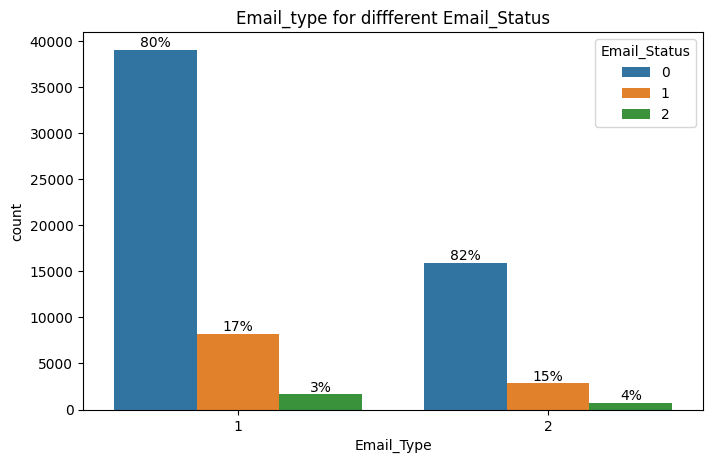

In [27]:
# Chart - 4 visualization code
ax=sns.countplot(x=email_df['Email_Type'],hue=email_df["Email_Status"])
plt.title('Email_type for diffferent Email_Status')
barPerc(email_df,'Email_Type',ax)


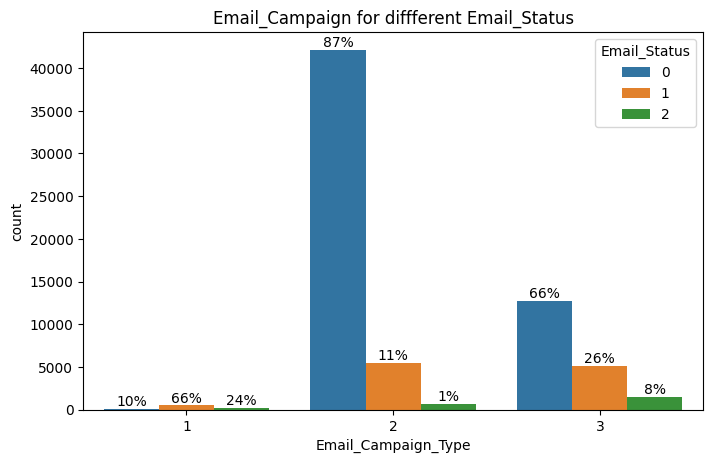

In [28]:
# Chart - 5 visualization code
ax=sns.countplot(email_df['Email_Campaign_Type'],hue=email_df["Email_Status"])
plt.title('Email_Campaign for diffferent Email_Status')
barPerc(email_df,'Email_Campaign_Type',ax)

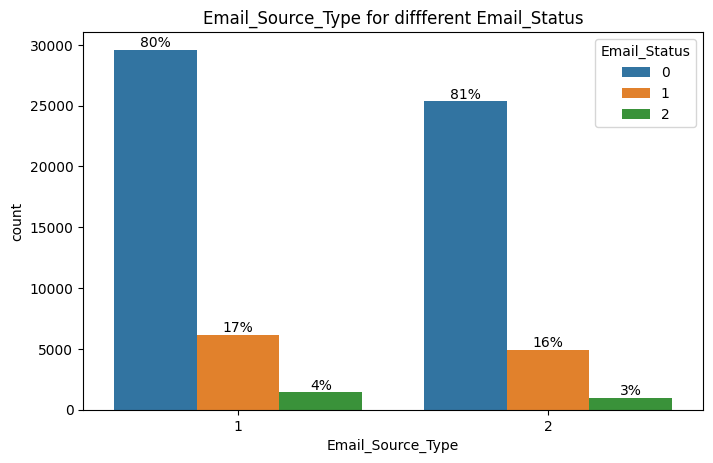

In [29]:
# Chart - 6 visualization code
ax=sns.countplot(email_df['Email_Source_Type'],hue=email_df["Email_Status"])
plt.title('Email_Source_Type for diffferent Email_Status')
barPerc(email_df,'Email_Source_Type',ax)

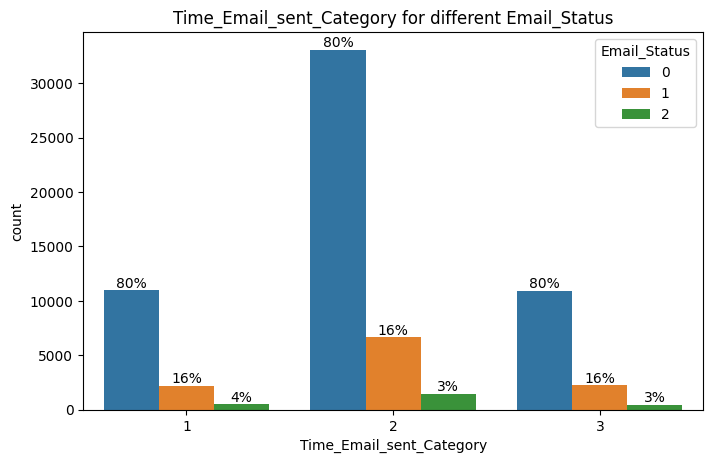

In [30]:
# Chart - 10 visualization code
ax=sns.countplot(email_df['Time_Email_sent_Category'],hue=email_df['Email_Status'])
plt.title('Time_Email_sent_Category for different Email_Status')
barPerc(email_df,'Time_Email_sent_Category',ax)


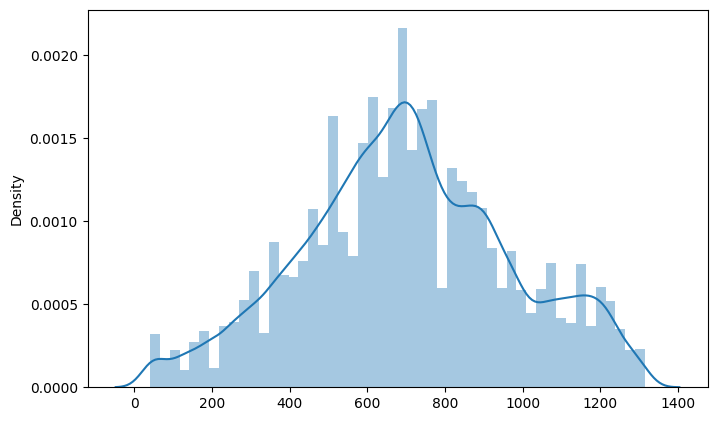

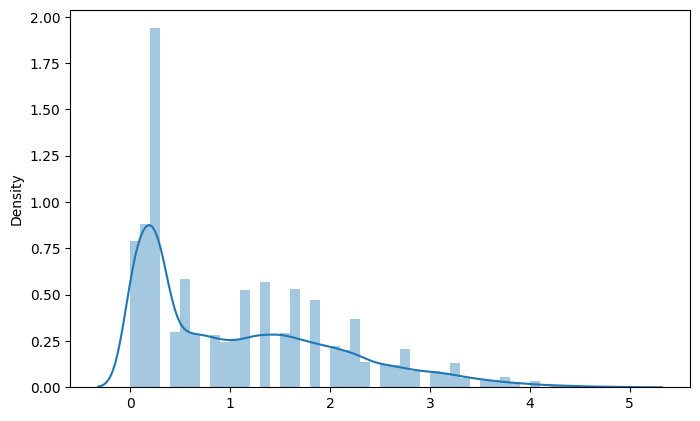

In [31]:
#continuous variables
#distribution of other continuous features and understanding where the data tends to
cont_var = ['Word_Count','Subject_Hotness_Score']
for i, value in enumerate(cont_var):
 sns.distplot(x=email_df[value], hist = True)
 plt.show()

# analyis of dependent variable

Text(0.5, 1.0, 'Email_satus distribution')

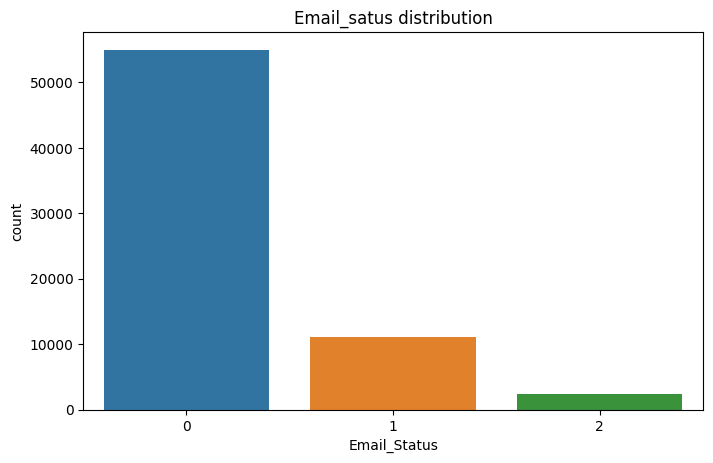

In [32]:
# Chart - 11 visualization code

sns.countplot(email_df['Email_Status'])
plt.title('Email_satus distribution')

dependent variable is imbalanced

#correlation

Correlation Heatmap

<AxesSubplot:>

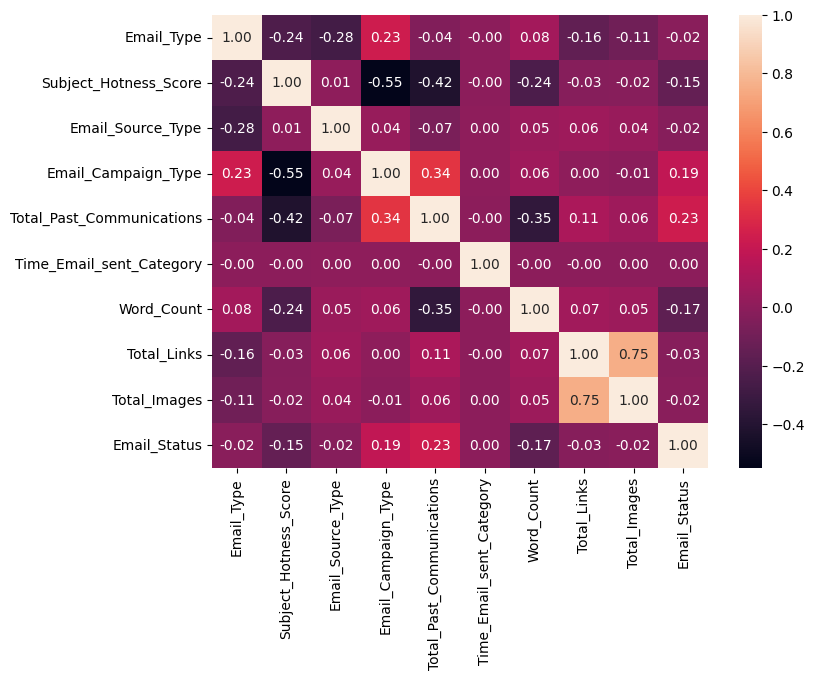

In [33]:
#correlation matrix
# Correlation Heatmap visualization code
# heatmap for the continous variables  in order to understand the relationship with dependent variable
plt.figure(figsize=(8,6))
sns.heatmap(email_df.corr(),annot=True,fmt='.2f')
     
     

Observation: Correlation matrix justifies our earlier hypotheses. Email Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. Word Count and Subject Hotness score are the most negatives amongst other. We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

In [34]:
categorical_variables = ['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

In [35]:
#VIF code
def vif_calc(df):
  vif = pd.DataFrame()
  vif["variables"] = df.columns
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return(vif)

In [36]:
#let's get VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


#feature manipulation

total images vif is large and its positivly correalted with total images.so we cam merge them.


In [37]:
#we can try combining them up
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)
     

In [38]:
#let's check VIF scores
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,variables,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Total_Img_links,2.629047


#Outliers:

<AxesSubplot:>

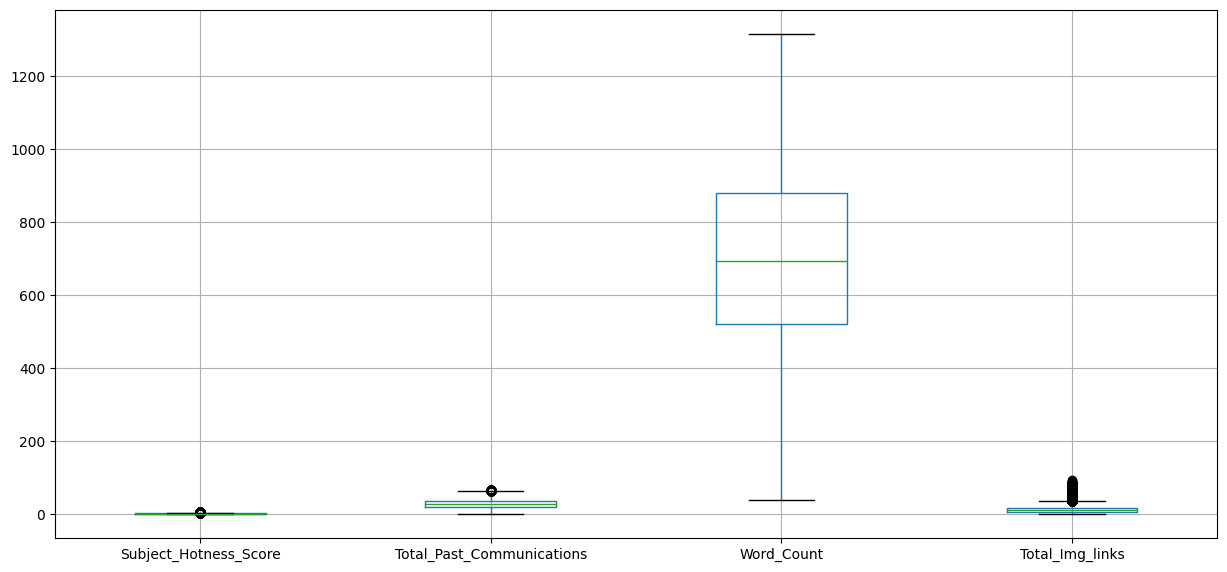

In [39]:
#Lets find out which all numerical column have outliers using boxplot
plt.figure(figsize=(15,7))
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']
df.boxplot(numerical_col)



{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Total_Img_links': {0: 3061, 1: 437, 2: 122}}


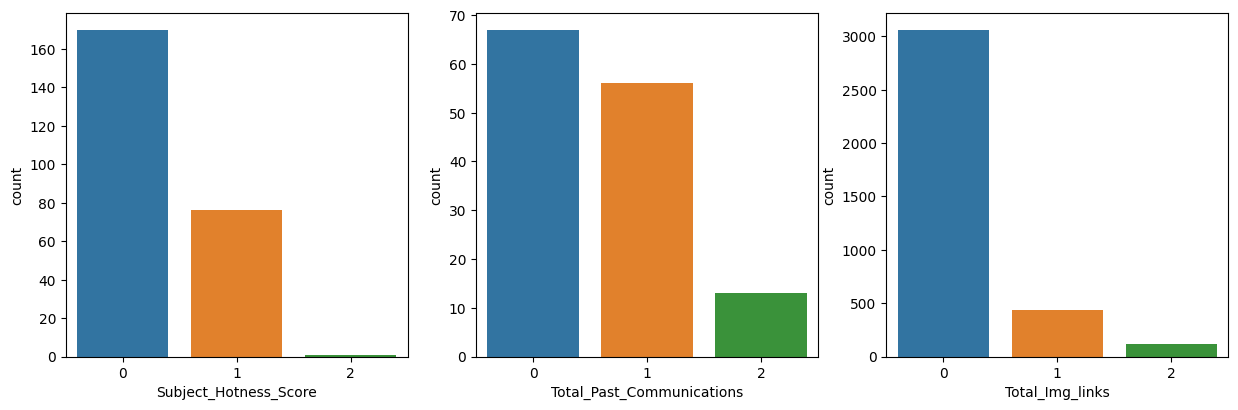

In [40]:
#removing Word_Count because it does'nt have outlier
numerical_col.remove('Word_Count')

fig = plt.figure(figsize = (15,10))
ix = 1
#dictionary d to store the count of each email_status 
d={}
#iterating through each column which have outlier
for x in [y for y in numerical_col]:
    #Finding Quartile
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    #Calculating Inter Quartile Range
    intr_qr = q75-q25
    #Fixing Boundaries for outliers
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    
    #list y to store email_status of only outliers
    y=[]
    y=df.loc[df[x] < min]['Email_Status'].tolist()
    y.append(df.loc[df[x] > max]['Email_Status'].tolist()) 
    d[x]={}
    for i in y[0]:
      d[x][i] = d[x].get(i,0) + 1
    ax1 = fig.add_subplot(2,3,ix)
    sns.countplot(y[0],ax=ax1)
    plt.xlabel(x)      
    ix = ix +1
print(d)

In [41]:
#finding the percentage of minority classs going to be affected by outliers
sum_min=0
sum_maj=0
for x in [y for y in numerical_col]:
  sum_min+=d[x][1]
  sum_min+=d[x][2]
  sum_maj+=d[x][0]
total=df.groupby('Email_Status').count()['Email_Type'][1]+df.groupby('Email_Status').count()['Email_Type'][2]
total_0=df.groupby('Email_Status').count()['Email_Type'][0]
print("Percentage of majority class having outliers = ",100*sum_maj/total_0)
print("Percentage of minority class having outliers = ",100*sum_min/total)
     

Percentage of majority class having outliers =  6.002803006861907
Percentage of minority class having outliers =  5.256486728303012


In [42]:
#Since more than 5% of minority classes will be removed if we delete outliers and we don't want that so we will keep it as it is

In [43]:
#Dropping Email_ID column
print(df.shape)

(68353, 9)


We calculated the number of outliers with respect to the individual classes of our target variable. The minority class in our target variable is 1 and 2. But when we get rid of outliers we should check that we aren't deleting more than 5% of useful information related to minority class. Otherwise, the model will not be able to classify our minority classes correctly having lack of information. Let's check the percentage of outliers in minority class.

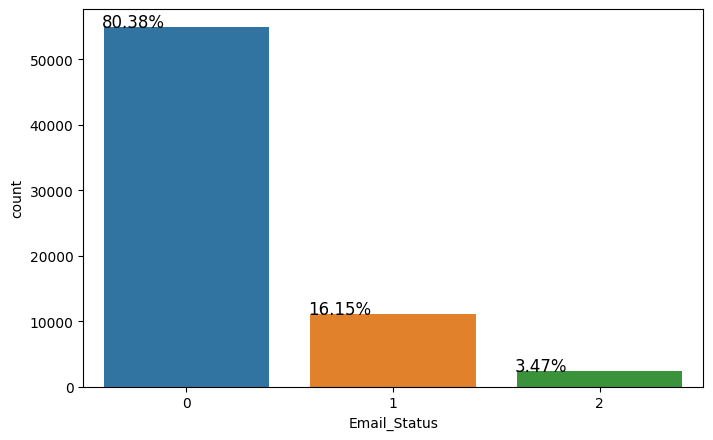

In [44]:
#count plot for target variable
#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

In [45]:
df.groupby('Email_Status').count()['Email_Type']
     

Email_Status
0    54941
1    11039
2     2373
Name: Email_Type, dtype: int64

Dependent variable is highly imbalanced . Before treating that lets normalize our data


In [46]:
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']
df=pd.get_dummies(df, columns=cat_col)
df.drop('Email_Type_2',axis=1,inplace=True) #Since they have binary category
df.drop('Email_Source_Type_2',axis=1,inplace=True)
     

In [47]:
#Pushing Email_Status at last of the DataFrame
list_of_col=list(df.columns)
list_of_col.remove('Email_Status')
list_of_col.append('Email_Status')
list_of_col
df=df[list_of_col]
df.head(2)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,2.2,33.0,440,8.0,1,0,0,1,0,1,0,0,0
1,2.1,15.0,504,5.0,0,1,0,1,0,0,1,0,0


#feature selection

In [48]:
df.columns
     

Index(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count',
       'Total_Img_links', 'Email_Type_1', 'Email_Source_Type_1',
       'Email_Campaign_Type_1', 'Email_Campaign_Type_2',
       'Email_Campaign_Type_3', 'Time_Email_sent_Category_1',
       'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3',
       'Email_Status'],
      dtype='object')

In [49]:
# Select your features wisely to avoid overfitting
from sklearn.feature_selection import chi2
p_val_f_val=chi2(df.drop('Email_Status',axis=1),df['Email_Status'])
p_val_f_val

(array([1.36579326e+03, 1.88720088e+04, 2.59026873e+05, 7.89795712e+02,
        1.56351263e+01, 2.00222552e+01, 2.43245169e+03, 1.54584125e+03,
        2.75522291e+03, 2.19825788e-01, 6.59315342e-02, 8.20735357e-01]),
 array([2.64096441e-297, 0.00000000e+000, 0.00000000e+000, 3.14804050e-172,
        4.02601564e-004, 4.48975390e-005, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 8.95912171e-001, 9.67571682e-001, 6.63406285e-001]))

In [50]:
p_val=pd.Series(p_val_f_val[1])
p_val.index=df.drop('Email_Status',axis=1).columns
p_val.sort_index(ascending=False)

Word_Count                     0.000000e+00
Total_Past_Communications      0.000000e+00
Total_Img_links               3.148041e-172
Time_Email_sent_Category_3     6.634063e-01
Time_Email_sent_Category_2     9.675717e-01
Time_Email_sent_Category_1     8.959122e-01
Subject_Hotness_Score         2.640964e-297
Email_Type_1                   4.026016e-04
Email_Source_Type_1            4.489754e-05
Email_Campaign_Type_3          0.000000e+00
Email_Campaign_Type_2          0.000000e+00
Email_Campaign_Type_1          0.000000e+00
dtype: float64

Using Mutual Information Gain method to select features

<AxesSubplot:>

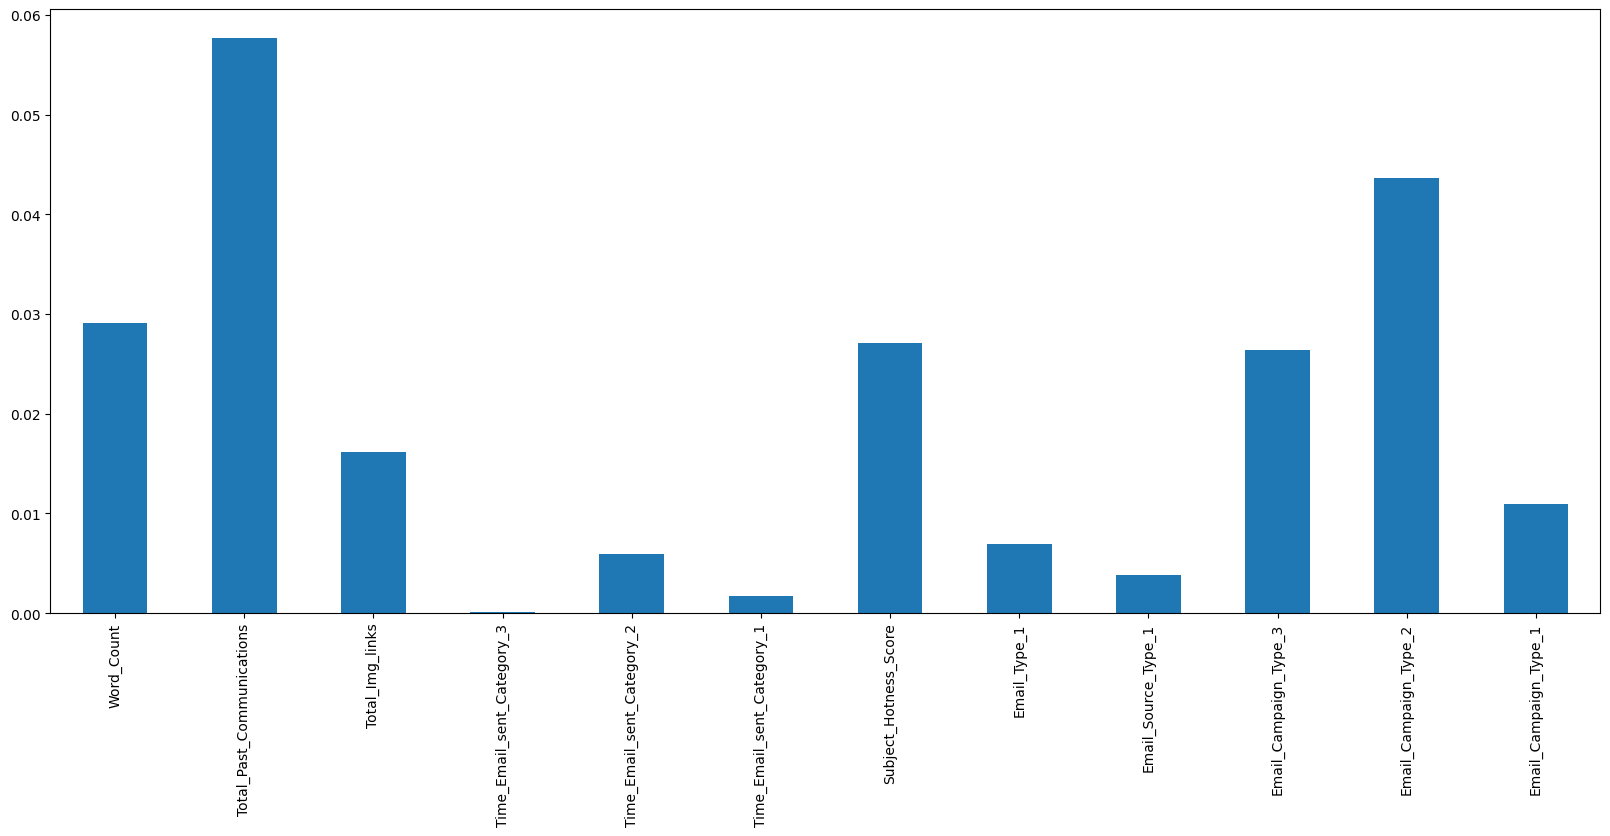

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_gain=mutual_info_classif(df.drop('Email_Status',axis=1),df['Email_Status'])
mutual_info_gain=pd.Series(mutual_info_gain)
mutual_info_gain.index=df.drop('Email_Status',axis=1).columns
mutual_info_gain.sort_index(ascending=False).plot.bar(figsize=(20,8))

#What all feature selection methods have you used and why?
Using Chi Square method, the lesser the p_values are higher will be the importance

Mutual Information gain method is also used, higher the values of mutual_info_gain higher is the importance.

Based on all this techniques we selected our features as

email_attachments
Total_Past_Communications ,
Subject_Hotness_Score ,
Email_source_type ,
Email_Campaign_Type ,
Word_Count

We would like to drop


Time_Email_sent_Category ,
Email_Type

and from total_link and total_images we extract new feature as both are correleted to each other

#Data Scaling

In [52]:
# apply normalization techniques
numerical_col=['Subject_Hotness_Score','Total_Past_Communications','Word_Count','Total_Img_links']
for column in numerical_col:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) 
     

df.head()
     

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Total_Img_links,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3,Email_Status
0,0.44,0.492537,0.313480,0.076087,1,0,0,1,0,1,0,0,0
1,0.42,0.223881,0.363636,0.043478,0,1,0,1,0,0,1,0,0
2,0.02,0.537313,0.722571,0.043478,0,1,0,0,1,0,1,0,1
3,0.60,0.373134,0.446708,0.163043,1,0,0,1,0,0,1,0,0
4,0.00,0.268657,0.710815,0.032609,1,0,0,0,1,0,1,0,0


In [53]:
df.shape


(68353, 13)

#Modelling:
Train-Test Split

In [54]:
#X and Y 
X = df.drop('Email_Status',axis=1)
y = df['Email_Status']
print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

Shape of X: (68353, 12)
Shape of Y: (68353,)


In [55]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y) 
#we need to stratify to get same proprtion of classes in both the sets
     

#Imbalance Handling

In [56]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)
x_train_rus, y_train_rus = rus.fit_resample(df.iloc[:,0:-1], df['Email_Status'])

print('Original dataset shape:', len(df))
print('Resampled dataset shape', len(y_train_rus))
     

Original dataset shape: 68353
Resampled dataset shape 7119


Text(0.5, 1.0, 'Before Undersampling')

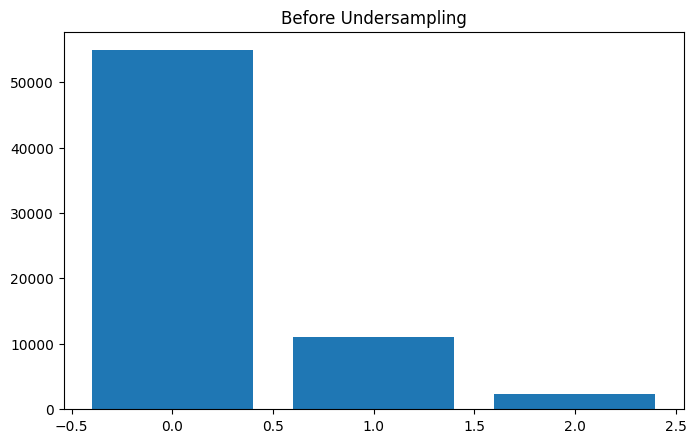

In [57]:
plt.bar(Counter(df['Email_Status']).keys(), Counter(df['Email_Status']).values())
plt.title("Before Undersampling")

Text(0.5, 1.0, 'After Undersampling')

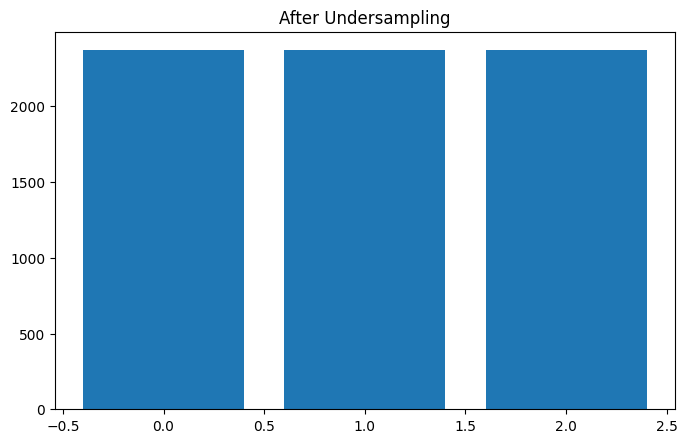

In [58]:
plt.bar(Counter(y_train_rus).keys(), Counter(y_train_rus).values())
plt.title("After Undersampling")
     

In [59]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(df.iloc[:,0:-1], df['Email_Status'])
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 68353
Resampled dataset shape 164823


Text(0.5, 1.0, 'After oversampling')

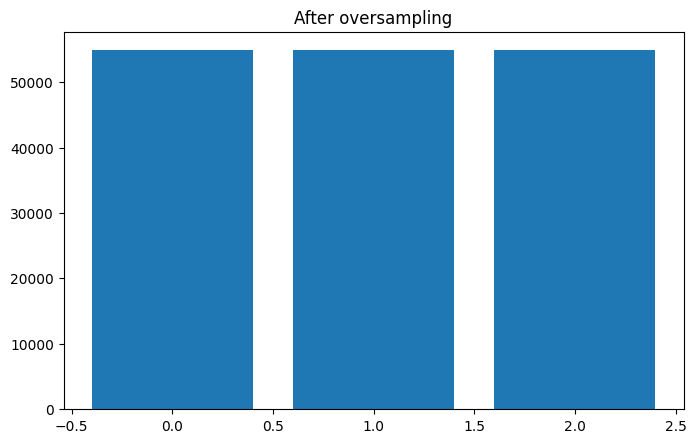

In [60]:
#visualization of resampled data
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values())
plt.title("After oversampling")
     

#ML Model Implementation*

Defining General Evaluation Process

In [88]:
#Function to evaluate the model

def model_evaluation(model_name_RUS,model_name_SMOTE,model_var_rus, model_var_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Random Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions random undersampling
  y_pred_rus_train = model_var_rus.predict(x_train_rus)
  y_pred_rus_test = model_var_rus.predict(X_test)
  #probs
  train_rus_proba = model_var_rus.predict_proba(x_train_rus)
  test_rus_proba = model_var_rus.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy RUS
  accuracy_rus_train = accuracy_score(y_train_rus,y_pred_rus_train)
  accuracy_rus_test = accuracy_score(y_test,y_pred_rus_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix RUS
  cm_rus_train = confusion_matrix(y_train_rus,y_pred_rus_train)
  cm_rus_test = confusion_matrix(y_test,y_pred_rus_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall RUS
  train_recall_rus = recall_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_recall_rus = recall_score(y_test,y_pred_rus_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision RUS
  train_precision_rus = precision_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_precision_rus = precision_score(y_test,y_pred_rus_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score RUS
  train_f1_rus = f1_score(y_train_rus,y_pred_rus_train, average='weighted')
  test_f1_rus = f1_score(y_test,y_pred_rus_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC RUS
  train_auc_rus = roc_auc_score(y_train_rus,train_rus_proba,average='weighted',multi_class = 'ovr')
  test_auc_rus = roc_auc_score(y_test,test_rus_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results RUS
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_RUS) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_rus_test)
  print(classification_report(y_test,y_pred_rus_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_rus_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+"AUC="+str(test_auc_rus))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+"AUC="+str(test_auc_rus))
  plt.title('Multiclass ROC curve of ' + str(model_name_RUS))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_rus = [model_name_RUS,accuracy_rus_train,train_recall_rus,train_precision_rus,train_f1_rus,train_auc_rus,accuracy_rus_test,test_recall_rus,test_precision_rus,test_f1_rus,test_auc_rus]
  final_dict_rus = dict(zip(comparison_columns,metric_scores_rus))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_rus, final_dict_smote]
  return dict_list
     

In [90]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

**Logistic Regression:**

Logistic Regression is a classification algorithm that predicts the probability of an outcome that can have only two values.

Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

In [91]:
#importing libraries
from sklearn.linear_model import LogisticRegression
#fitting Undersampling
logistic_rus = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_rus.fit(x_train_rus, y_train_rus)
     

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [92]:
#fitting on smote
logistic_smote = LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs')
logistic_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [78]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall','Test_Precision'	,'Test_F1score',	'Test_AUC']

----- Evaluation on Random Undersampled data -----LogisticReg RUS------
--------------Test data ---------------

Confusion matrix 

[[7588 1522 1878]
 [ 662  502 1044]
 [  91   62  322]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.79     10988
           1       0.24      0.23      0.23      2208
           2       0.10      0.68      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.67     13671



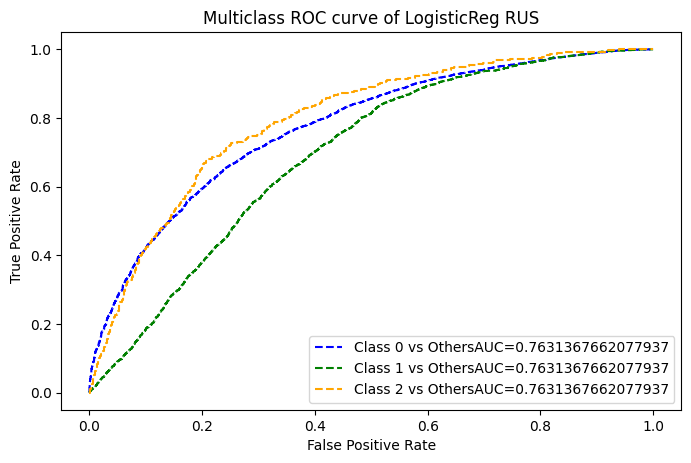

----- Evaluation on SMOTE data -------LogisticReg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7715 1445 1828]
 [ 679  495 1034]
 [  92   67  316]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     10988
           1       0.25      0.22      0.23      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.62     13671
   macro avg       0.42      0.53      0.40     13671
weighted avg       0.77      0.62      0.68     13671



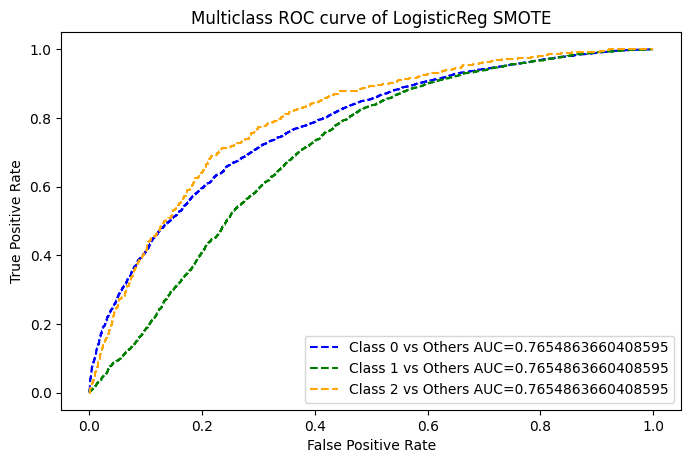

[{'Model_Name': 'LogisticReg RUS',
  'Train_Accuracy': 0.5370136255092007,
  'Train_Recall': 0.5370136255092007,
  'Train_Precision': 0.5200037170869718,
  'Train_F1score': 0.5099999559306045,
  'Train_AUC': 0.7216997692647424,
  'Test_Accuracy': 0.6153170945797674,
  'Test_Recall': 0.6153170945797674,
  'Test_Precision': 0.773501941907297,
  'Test_F1score': 0.6748336447671344,
  'Test_AUC': 0.7631367662077937},
 {'Model_Name': 'LogisticReg SMOTE',
  'Train_Accuracy': 0.5349920824156823,
  'Train_Recall': 0.5349920824156823,
  'Train_Precision': 0.5198212868963896,
  'Train_F1score': 0.5091669140714385,
  'Train_AUC': 0.7198693402710256,
  'Test_Accuracy': 0.6236559139784946,
  'Test_Recall': 0.6236559139784946,
  'Test_Precision': 0.7740095403388754,
  'Test_F1score': 0.6807841035707776,
  'Test_AUC': 0.7654863660408595}]

In [93]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('LogisticReg RUS','LogisticReg SMOTE',logistic_rus, logistic_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
logistic_reg_list

In [80]:
print(logistic_reg_list)

None


In [94]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [95]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.537014,0.537014,0.520004,0.510000,0.721700,0.615317,0.615317,0.773502,0.674834,0.763137
1,LogisticReg SMOTE,0.534992,0.534992,0.519821,0.509167,0.719869,0.623656,0.623656,0.774010,0.680784,0.765486


Decision Tree Classifier

In [96]:
#Importing libraries
from sklearn.tree import DecisionTreeClassifier

In [97]:
#Classifier RUS
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)
     

DecisionTreeClassifier()

In [100]:
#Classifier SMOTE
dt_smote = DecisionTreeClassifier()
dt_smote.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

----- Evaluation on Random Undersampled data -----Decision Tree RUS------
--------------Test data ---------------

Confusion matrix 

[[6719 2515 1754]
 [ 478 1049  681]
 [   0    2  473]]
              precision    recall  f1-score   support

           0       0.93      0.61      0.74     10988
           1       0.29      0.48      0.36      2208
           2       0.16      1.00      0.28       475

    accuracy                           0.60     13671
   macro avg       0.46      0.69      0.46     13671
weighted avg       0.80      0.60      0.66     13671



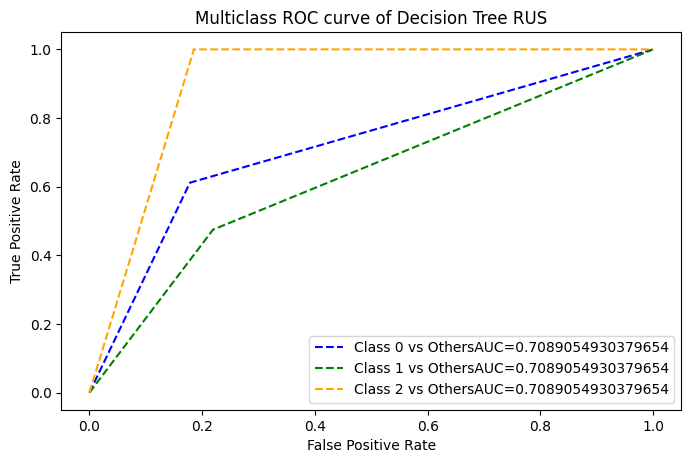

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[10988     0     0]
 [   17  2191     0]
 [    4     5   466]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10988
           1       1.00      0.99      1.00      2208
           2       1.00      0.98      0.99       475

    accuracy                           1.00     13671
   macro avg       1.00      0.99      0.99     13671
weighted avg       1.00      1.00      1.00     13671



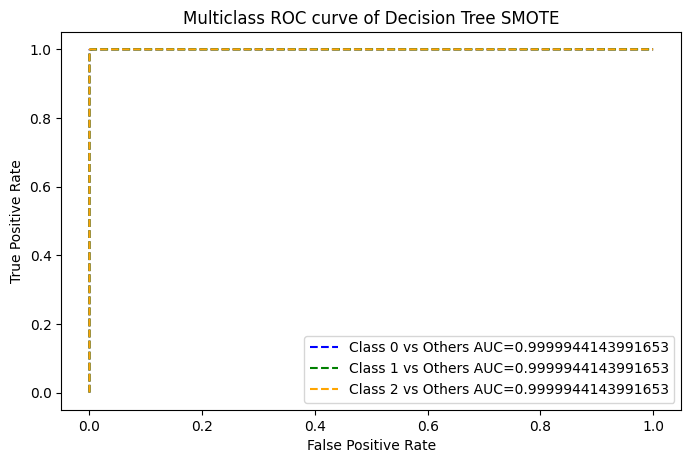

[{'Model_Name': 'Decision Tree RUS',
  'Train_Accuracy': 0.9992976541649108,
  'Train_Recall': 0.9992976541649108,
  'Train_Precision': 0.9992984227749743,
  'Train_F1score': 0.9992976538218362,
  'Train_AUC': 0.9999993488576329,
  'Test_Accuracy': 0.6028088654816766,
  'Test_Recall': 0.6028088654816766,
  'Test_Precision': 0.8035254807857689,
  'Test_F1score': 0.6623370057631421,
  'Test_AUC': 0.7089054930379654},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.9992598120407953,
  'Train_Recall': 0.9992598120407953,
  'Train_Precision': 0.9992606900484049,
  'Train_F1score': 0.9992598700398384,
  'Train_AUC': 0.999999405888579,
  'Test_Accuracy': 0.9980981639967815,
  'Test_Recall': 0.9980981639967815,
  'Test_Precision': 0.9980990955840745,
  'Test_F1score': 0.9980935565812508,
  'Test_AUC': 0.9999944143991653}]

In [101]:
dt_eval_list = model_evaluation('Decision Tree RUS', 'Decision Tree SMOTE', dt_rus, dt_smote, x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
dt_eval_list

In [102]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.537014,0.537014,0.520004,0.510000,0.721700,0.615317,0.615317,0.773502,0.674834,0.763137
1,LogisticReg SMOTE,0.534992,0.534992,0.519821,0.509167,0.719869,0.623656,0.623656,0.774010,0.680784,0.765486
2,Decision Tree RUS,0.999298,0.999298,0.999298,0.999298,0.999999,0.602809,0.602809,0.803525,0.662337,0.708905
3,Decision Tree SMOTE,0.999260,0.999260,0.999261,0.999260,0.999999,0.998098,0.998098,0.998099,0.998094,0.999994


#XG Boost Model:
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. The two reasons to use XGBoost are also the two goals of the project:

Execution Speed.
Model Performance.

In [105]:
#importing
from xgboost import XGBClassifier

In [106]:
#fitting rus
xgb_rus = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_rus.fit(x_train_rus,y_train_rus)
     

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

In [107]:
#fitting smote
xgb_smote = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)
xgb_smote.fit(x_train_smote,y_train_smote)

XGBClassifier(max_depth=12, min_samples_leaf=20, min_samples_split=30,
              objective='multi:softprob')

----- Evaluation on Random Undersampled data -----XGB RUS------
--------------Test data ---------------

Confusion matrix 

[[7643 1866 1479]
 [ 480  988  740]
 [   2    3  470]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     10988
           1       0.35      0.45      0.39      2208
           2       0.17      0.99      0.30       475

    accuracy                           0.67     13671
   macro avg       0.49      0.71      0.50     13671
weighted avg       0.82      0.67      0.72     13671



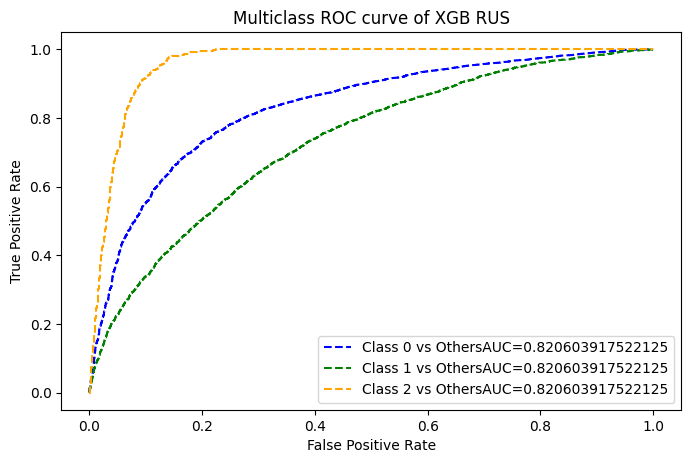

----- Evaluation on SMOTE data -------XGB SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[10625   310    53]
 [ 1055  1107    46]
 [  206    43   226]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10988
           1       0.76      0.50      0.60      2208
           2       0.70      0.48      0.57       475

    accuracy                           0.87     13671
   macro avg       0.78      0.65      0.70     13671
weighted avg       0.87      0.87      0.86     13671



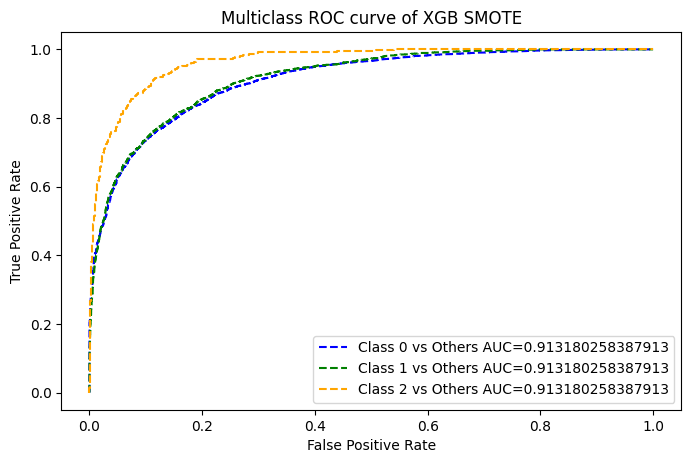

[{'Model_Name': 'XGB RUS',
  'Train_Accuracy': 0.9825818232897879,
  'Train_Recall': 0.9825818232897879,
  'Train_Precision': 0.9827353238728653,
  'Train_F1score': 0.9825950025507102,
  'Train_AUC': 0.9990132825347575,
  'Test_Accuracy': 0.6657157486650574,
  'Test_Recall': 0.6657157486650574,
  'Test_Precision': 0.8179903472885727,
  'Test_F1score': 0.7161431239811927,
  'Test_AUC': 0.820603917522125},
 {'Model_Name': 'XGB SMOTE',
  'Train_Accuracy': 0.9009422228693811,
  'Train_Recall': 0.9009422228693811,
  'Train_Precision': 0.9040067472892721,
  'Train_F1score': 0.8988267155015174,
  'Train_AUC': 0.9794317109594516,
  'Test_Accuracy': 0.8746982664033355,
  'Test_Recall': 0.8746982664033355,
  'Test_Precision': 0.8650958624000736,
  'Test_F1score': 0.8637991990781367,
  'Test_AUC': 0.913180258387913}]

In [108]:
#model evaluation of XGB
xgb_eval_list = model_evaluation('XGB RUS', 'XGB SMOTE',xgb_rus, xgb_smote,x_train_rus, y_train_rus, x_train_smote, y_train_smote, X_test, y_test)
xgb_eval_list

In [109]:
#adding list
add_list_to_final_df(xgb_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_Accuracy,Train_Recall,Train_Precision,Train_F1score,Train_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1score,Test_AUC
0,LogisticReg RUS,0.537014,0.537014,0.520004,0.510000,0.721700,0.615317,0.615317,0.773502,0.674834,0.763137
1,LogisticReg SMOTE,0.534992,0.534992,0.519821,0.509167,0.719869,0.623656,0.623656,0.774010,0.680784,0.765486
2,Decision Tree RUS,0.999298,0.999298,0.999298,0.999298,0.999999,0.602809,0.602809,0.803525,0.662337,0.708905
3,Decision Tree SMOTE,0.999260,0.999260,0.999261,0.999260,0.999999,0.998098,0.998098,0.998099,0.998094,0.999994
4,XGB RUS,0.982582,0.982582,0.982735,0.982595,0.999013,0.665716,0.665716,0.817990,0.716143,0.820604
5,XGB SMOTE,0.900942,0.900942,0.904007,0.898827,0.979432,0.874698,0.874698,0.865096,0.863799,0.913180


#conclusion:

Exploratory Data Analysis:

In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledged are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as a factor in people ignoring, reading or acknowledging our emails.

In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

Time email sent category cannot be considered as a relevant factor in classifying the emails. Both the feature importance showed this particular thing. If we consider Time email sent category 2 as middle of the of course they are going to be read and acknowledged more than morning and night.

Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

More images were there in ignored emails.

There are outliers in almost every continuous variable except Word Count and upon analyzing, it was found that outliers make up for more than 5% of the minority data and will influence the results either way, so it was better not to get rid of them.

Modeling:

Imbalanced Class Handling techniques such as Undersampling and SMOTE were done after train-test split only on the training data, to make sure that the model doesn't catch up to the test set at all and it remains unknown which somewhat reduced our results.

It is observed that SMOTE worked considerably better than Random Undersampling, it may have led to loss of information.
Decision Tree Model is overfitting. It is working really great on train data and worse on test data.

XGBoost Algorithm worked in the best way possible with such imbalanced data with outliers, with F1 Score of 0.71 on the test set  USING rus and 0.86 using SMOTE